## On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [1]:
import pandas as pd

In [2]:
#Load Data
df = pd.read_csv("data.csv")
df.set_index("order_id")

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...
4996,73,993,330,2,debit,2017-03-30 13:47:17
4997,48,789,234,2,cash,2017-03-16 20:36:16
4998,56,867,351,3,cash,2017-03-19 5:42:42


## Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [3]:
# View data statistics
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking as dataset the order_amount & total_items maximum is much larger than Q3 (Likely the issue)

In [4]:
#Recreate problem
df["order_amount"].mean()

3145.128

<AxesSubplot:>

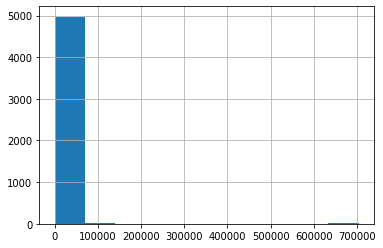

In [5]:
#check distribution for outliers
df["order_amount"].hist()

<AxesSubplot:>

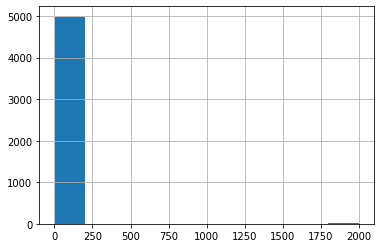

In [6]:
#check distribution for outliers
df["total_items"].hist()

Looks like a couple of large bulk orders so doing an average on order amount would not work.\
Also each store sells 1 model of shoe so each store should have the same price per shoe. (I should check this)

<AxesSubplot:title={'center':'order_amount'}, xlabel='shop_id'>

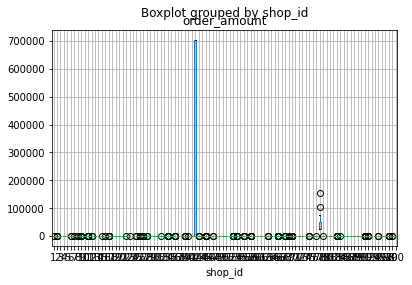

In [7]:
df.boxplot(by="shop_id", column="order_amount")

Looks like a couple shops have strange data on their order amounts.\
Let me check each shops order_amount vs total_item. It should be a linear relationship.

<AxesSubplot:xlabel='shop_id', ylabel='amount_per_item'>

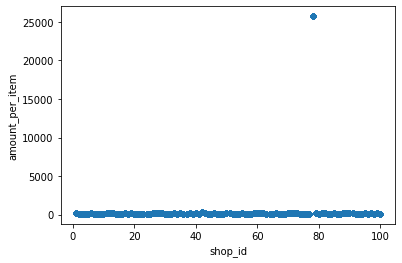

In [8]:
df["amount_per_item"] = df["order_amount"] / df["total_items"] 
df.plot.scatter("shop_id", "amount_per_item")

The scatter plot clearly shows there is an error in the data (a shoe does not cost $25000), removing this outlier should fix the data

<AxesSubplot:xlabel='shop_id', ylabel='amount_per_item'>

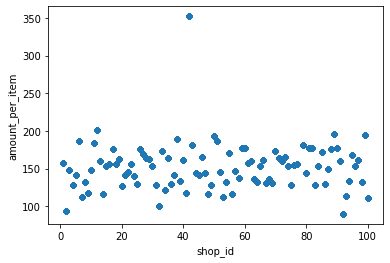

In [9]:
#Clean dataset of outliers
remove = df["amount_per_item"].max()

#Using the assignment method if faster than drop
mask = ~(df["amount_per_item"] == remove)
df = df[mask]

df.plot.scatter("shop_id", "amount_per_item")

While maintaining integrity the data is much cleaner now.\
However I want to investigate the maximum order amount as it is unusual

In [10]:
# See if cleaning worked
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,amount_per_item
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


<AxesSubplot:>

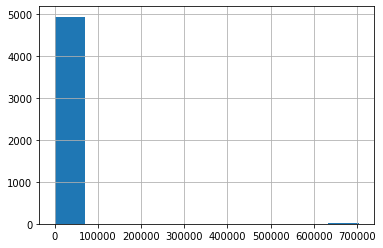

In [11]:
# Check if order amount histogram is acceptable
df["order_amount"].hist()

<AxesSubplot:>

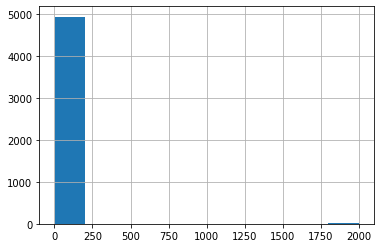

In [12]:
# Check of total items histogram is acceptable
df["total_items"].hist()

In [13]:
# View Orders with high order amounts
df[df["order_amount"] == 704000.000000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [14]:
# View other orders from same user id
df[df["user_id"] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Given that this same user made the exact same huge purchases from a credit card at the same time of day multiple times, I can identify this user as fraudulent and remove it from the dataset

In [15]:
# Remove User ID 607 from data
df = df[df["user_id"] != 607]
# See if cleaning worked
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,amount_per_item
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


<AxesSubplot:xlabel='shop_id', ylabel='amount_per_item'>

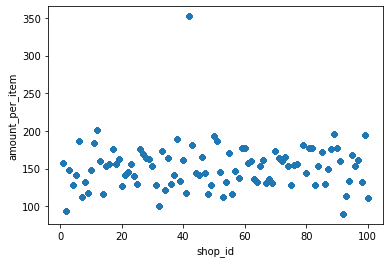

In [16]:
df.plot.scatter("shop_id", "amount_per_item")

## What metric would you report for this dataset?

The better way to get the AOV after cleaning would be to get the sum of all order amounts and divide by the total number of items sold. That would give the average cost per item. Then multiply that by the average items per order to get the average order value.

## What is its value?

In [17]:
# Better Average
avg_items_per_order = df["total_items"].median()
avg_item_value = df["order_amount"].sum() / df["total_items"].sum()
AOV = avg_item_value * avg_items_per_order
print("AOV:", AOV)

AOV: 303.37936636880585
